# Fraud Detection (Using Ebay Dataset)

* [Data Understanding](#Data-Understanding)
    - Data collection/acquisition
    - Exploring Raw Data (Initial EDA)
        + Describing Data
        + Viewing Structure/Data Types
        + Verifying Data Quality
* [Data Preparation](#Data-Preparation)
    - Tidying Data (Data Wrangling)
        + Reshaping Data (melting, pivoting vs.)
        + Splitting Cells
    - Data Preprocessing (Data Wrangling?)
        + Data Cleansing
            - Missing, Outlier, Inconsistent and Noisy Data Analysis
            - Converting Data Types
        + Data Transformation (Manipulation)
            - Feature Engineering
            - Feature Scaling (Standardization, Normalization)
            - Feature Selection (Data Reduction)
    - Data Exploration (EDA)
        + Summary
        + Visual
    - Sampling (Data cok buyukse)?
    - Data Splitting
    - Setting up a Pipeline (Asagidaki asamada olabilir)?
* [Modelling](#Modelling)
    - Selecting Modeling Techniques
    - Building Model
    - Assessing Model
* [Evaluation](#Evaluation)
    - Evaluating Results
    - Reviewing Process

---

## Data Understanding

In [2]:
# Import necessary modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data collection/acquisition

In [3]:
df = pd.read_csv("data/autos.csv", encoding='cp1252')

---

### Exploring Raw Data (Initial EDA)

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
df.describe(include='object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [19]:
# Check the levels of potentially unnecessary columns
inspect_cols = ['seller', 'offerType', 'nrOfPictures', 'abtest']
for col in inspect_cols:
    print(df[col].value_counts(), '\n')

privat        371525
gewerblich         3
Name: seller, dtype: int64 

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64 

0    371528
Name: nrOfPictures, dtype: int64 

test       192585
control    178943
Name: abtest, dtype: int64 



## Data Preparation

### Tidying Data

The columns lastSeen and dateCreated could be used to estimate how long a car will be at least online before it is sold.

In [7]:
# Create a new column about how long a car will is online
df['duration'] = pd.to_datetime(df['lastSeen']) - pd.to_datetime(df['dateCreated'])
df['duration'].head()

0   14 days 03:16:57
1   14 days 01:46:50
2   22 days 12:47:46
3    0 days 17:40:17
4    6 days 10:17:21
Name: duration, dtype: timedelta64[ns]

### Data Preprocessing 

### Data Cleansing

In [8]:
# Drop unnecessary columns
df.drop(['seller', 'offerType', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated', 'monthOfRegistration'], axis='columns', inplace=True)

# Drop 'name' column for initial analysis (This column includes plain text user entries of car descriptions)
df.drop(['name'], axis='columns', inplace=True) # Requires further feature engineering

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 12 columns):
price                 371528 non-null int64
abtest                371528 non-null object
vehicleType           333659 non-null object
yearOfRegistration    371528 non-null int64
gearbox               351319 non-null object
powerPS               371528 non-null int64
model                 351044 non-null object
kilometer             371528 non-null int64
fuelType              338142 non-null object
brand                 371528 non-null object
notRepairedDamage     299468 non-null object
duration              371528 non-null timedelta64[ns]
dtypes: int64(4), object(7), timedelta64[ns](1)
memory usage: 34.0+ MB


In [10]:
# Count the NaNs
df.isnull().sum()

price                     0
abtest                    0
vehicleType           37869
yearOfRegistration        0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
fuelType              33386
brand                     0
notRepairedDamage     72060
duration                  0
dtype: int64

For initial analysis, I'll drop all the NaNs. 

**!!!** I think it is highly possible that **fraudulent** ads have less information on specific columns. Such a pattern may indicate an anomaly. Therefore, instead of removing the null values, we may want to keep them and impute NaNs with a specific string value such as "not available".
**!** Another possibility is that missing values are explicitly written in the user entry (description) section of the ad. We may need to extract these values and fill the NaNs with those information if available.

In [11]:
# Drop all the rows with missing data
df.dropna(inplace = True)

# Fill NaNs with "not available"
# df[['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']].fillna(value='not available', inplace=True)

In [12]:
# Count the NaNs
df.isnull().sum()

price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
duration              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 12 columns):
price                 260956 non-null int64
abtest                260956 non-null object
vehicleType           260956 non-null object
yearOfRegistration    260956 non-null int64
gearbox               260956 non-null object
powerPS               260956 non-null int64
model                 260956 non-null object
kilometer             260956 non-null int64
fuelType              260956 non-null object
brand                 260956 non-null object
notRepairedDamage     260956 non-null object
duration              260956 non-null timedelta64[ns]
dtypes: int64(4), object(7), timedelta64[ns](1)
memory usage: 25.9+ MB


In [14]:
# Check for duplicate rows
df.duplicated().sum()

99

In [15]:
# Delete duplicates
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(260857, 12)

### Data Exploration (EDA)

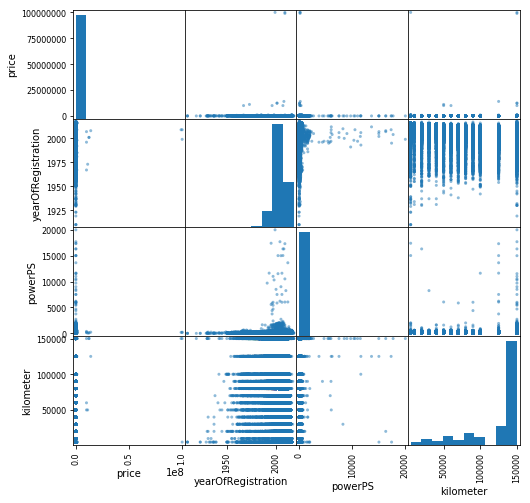

In [17]:
pd.plotting.scatter_matrix(df, figsize = [8, 8])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1db6fa90>,
      dtype=object)

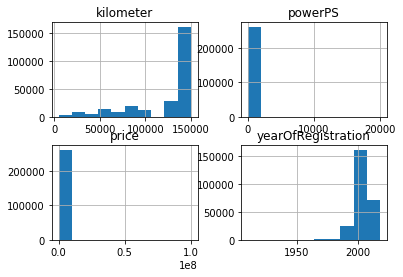

In [18]:
df.hist()

### Data Transformation (Manipulation)

### Feature Scaling

#### Normalization

In [19]:
df.price.describe()

count    2.608570e+05
mean     8.208850e+03
std      3.433742e+05
min      0.000000e+00
25%      1.500000e+03
50%      3.850000e+03
75%      8.600000e+03
max      1.000000e+08
Name: price, dtype: float64

It is better to perform a log transformation on the target variable since it is strongly right skewed. Some values in the `price` column is 0. Thus, we can use `numpy.log1p` instead of `numpy.log`. `numpy.log1p` calculates `log(1 + x)`.

In [45]:
df[df.price > 1000000]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,duration,price_log,powerPS_log,age
20143,1250000,test,coupe,2016,manuell,500,911,5000,benzin,porsche,nein,3,14.038655,6.216606,0
21467,9999999,control,coupe,1967,manuell,215,911,50000,benzin,porsche,nein,13,16.118096,5.375278,49
54295,10000000,control,bus,2007,manuell,143,5_reihe,150000,diesel,mazda,nein,2,16.118096,4.969813,9
78480,1250000,test,coupe,2016,manuell,500,911,5000,benzin,porsche,nein,5,14.038655,6.216606,0
91106,9999999,test,limousine,1996,manuell,380,a4,60000,benzin,audi,nein,0,16.118096,5.942799,20
127820,99999999,test,kombi,1999,manuell,165,a6,5000,benzin,audi,nein,0,18.420681,5.111988,17
139052,99999999,control,coupe,2009,automatik,224,andere,150000,diesel,mercedes_benz,ja,0,18.420681,5.416100,7
210657,11111111,test,limousine,1973,manuell,48,escort,50000,benzin,ford,nein,0,16.223456,3.891820,43
241847,12345678,control,limousine,2001,manuell,101,vectra,150000,benzin,opel,nein,0,16.328817,4.624973,15
251980,99000000,test,limousine,2009,automatik,190,a6,150000,diesel,audi,nein,4,18.410630,5.252273,7


In [56]:
print(sum(df.price < 100))
print(sum(df.price == 0))

4022
3389


There are so many 0s in the price column. We'd assume these values as missing. However, these may indicade anomaly.

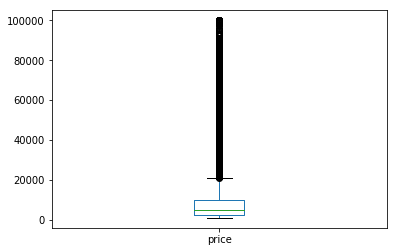

In [57]:
df[(df.price < 100000) & (df.price > 1000)].price.plot.box()

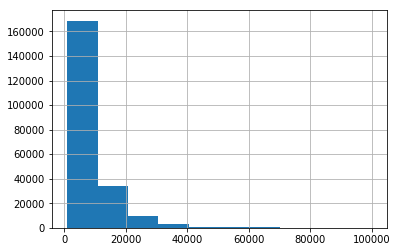

In [58]:
df[(df.price < 100000) & (df.price > 1000)].price.hist()

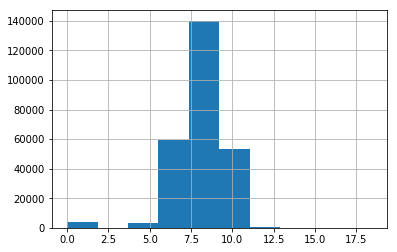

In [20]:
np.log1p(df.price).hist()

In [21]:
df['price_log'] = np.log1p(df.price)

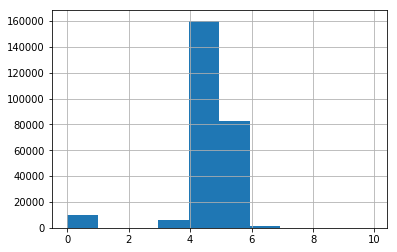

In [22]:
np.log1p(df.powerPS).hist()

In [23]:
df['powerPS_log'] = np.log1p(df.powerPS)

#### Scaling/Standardizing Columns

In [24]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,duration,price_log,powerPS_log
count,2.608570e+05,260857.000000,260857.000000,260857.000000,260857,260857.000000,260857.000000
mean,8.208850e+03,2003.309108,126.325887,124061.343955,9 days 16:40:09.410194,8.100282,4.592059
std,3.433742e+05,6.512028,145.300136,39847.681204,8 days 15:57:45.675753,1.505536,1.009977
min,0.000000e+00,1910.000000,0.000000,5000.000000,0 days 00:36:14,0.000000,0.000000
25%,1.500000e+03,1999.000000,78.000000,100000.000000,2 days 16:45:05,7.313887,4.369448
50%,3.850000e+03,2004.000000,116.000000,150000.000000,6 days 23:17:39,8.256088,4.762174
75%,8.600000e+03,2008.000000,150.000000,150000.000000,14 days 14:58:11,9.059634,5.017280
max,1.000000e+08,2018.000000,20000.000000,150000.000000,384 days 03:45:01,18.420681,9.903538


In [25]:
df.var()

price                 1.179058e+11
yearOfRegistration    4.240650e+01
powerPS               2.111213e+04
kilometer             1.587838e+09
duration              5.605003e+29
price_log             2.266640e+00
powerPS_log           1.020053e+00
dtype: float64

In [26]:

# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# # Import StandardScaler from scikit-learn
# from sklearn.preprocessing import StandardScaler

# # Create the scaler
# ss = StandardScaler()

# # Take a subset of the DataFrame you want to scale 
# df_subset = df[['Ash', 'Alcalinity of ash', 'Magnesium']]

# # Apply the scaler to the DataFrame subset
# df_subset_scaled = ss.fit_transform(df_subset)

### Feature Engineering

#### Numeric

In [27]:
# Extract the day from the 'duration' column
df["duration"] = df["duration"].apply(lambda d: d.days)
df.duration.head()

3    0
4    6
5    2
6    4
7    4
Name: duration, dtype: int64

count    260857.000000
mean         12.690892
std           6.512028
min          -2.000000
25%           8.000000
50%          12.000000
75%          17.000000
max         106.000000
Name: age, dtype: float64


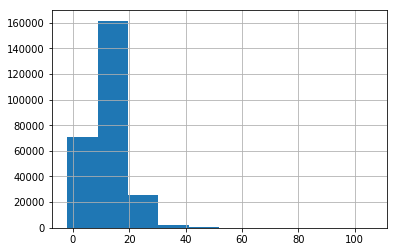

In [28]:
df["age"] = 2016 - df["yearOfRegistration"]
print(df.age.describe())
df["age"].hist()

In [29]:
# Print the wrong entries of yearOfRegistration
df[df.age < 0]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,duration,price_log,powerPS_log,age
45578,9999,test,kombi,2017,manuell,102,a3,90000,benzin,audi,nein,10,9.210340,4.634729,-1
56888,2350,control,limousine,2017,automatik,170,5er,150000,benzin,bmw,nein,23,7.762596,5.141664,-1
86636,4750,control,limousine,2018,manuell,0,polo,150000,diesel,volkswagen,nein,29,8.466110,0.000000,-2
102481,2350,control,limousine,2017,automatik,170,5er,150000,benzin,bmw,nein,16,7.762596,5.141664,-1
137101,11950,control,bus,2017,manuell,130,transporter,150000,diesel,volkswagen,nein,2,9.388570,4.875197,-1
167126,1900,control,kleinwagen,2018,manuell,75,polo,150000,benzin,volkswagen,nein,7,7.550135,4.330733,-2
213165,0,control,coupe,2017,manuell,105,3er,150000,benzin,bmw,nein,9,0.000000,4.663439,-1
243691,800,test,kleinwagen,2017,manuell,16,a3,30000,benzin,audi,ja,15,6.685861,2.833213,-1
248702,1650,control,coupe,2018,manuell,140,3er,150000,benzin,bmw,nein,17,7.409136,4.948760,-2
258859,6000,control,kleinwagen,2017,manuell,155,punto,150000,benzin,fiat,nein,12,8.699681,5.049856,-1


In [30]:
df2 = df[df.columns[(df.dtypes == "int64") | (df.dtypes == "float64")]]

# Drop unnecessary columns
df2.drop(['age', 'price', 'powerPS_log'], axis='columns', inplace=True)

# features
X2 = df2.drop('price_log', axis = 1)

# Target
y2 = df2['price_log']

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=57)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260857 entries, 3 to 371527
Data columns (total 5 columns):
yearOfRegistration    260857 non-null int64
powerPS               260857 non-null int64
kilometer             260857 non-null int64
duration              260857 non-null int64
price_log             260857 non-null float64
dtypes: float64(1), int64(4)
memory usage: 11.9 MB


In [32]:
from sklearn.linear_model import LinearRegression

# Create the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X2_train, y2_train)

# Print the R-squared
reg.score(X2_test, y2_test)

0.3015371445506275

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X2_train, y2_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   54.8s finished


0.5258369981638554
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


### Categorical Features

In [30]:
df.dtypes

price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
fuelType               object
brand                  object
notRepairedDamage      object
duration                int64
price_log             float64
powerPS_log           float64
age                     int64
dtype: object

In [31]:
# df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
# df.shape

(260857, 311)

In [32]:
# labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
# les = {}

# for l in labels:
#     les[l] = preprocessing.LabelEncoder()
#     les[l].fit(dedups[l])
#     tr = les[l].transform(dedups[l]) 
#     dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

# labeled = dedups[ ['price'
#                         ,'yearOfRegistration'
#                         ,'powerPS'
#                         ,'kilometer'
#                         ,'monthOfRegistration'
#                         , 'namelen'] 
#                     + [x+"_feat" for x in labels]]

## Feature Selection

In [33]:
# Drop unnecessary columns
df.drop(['yearOfRegistration', 'price', 'powerPS'], axis='columns', inplace=True)

In [34]:
corr = df[df.columns[(df.dtypes == "int64") | (df.dtypes == "float64")]].corr()

Text(0.5, 1.0, 'Pairwise Correlation Between (numeric) Variables')

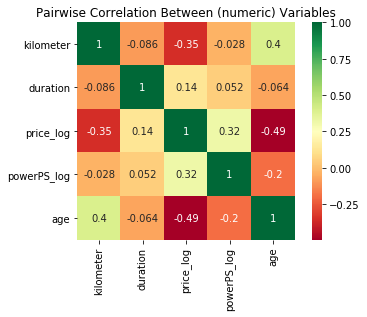

In [35]:
sns.heatmap(corr, square=True, cmap='RdYlGn', annot = True).set_title('Pairwise Correlation Between (numeric) Variables')

In [54]:
# List the correlation coefficients in ascending order
corr.loc[:,'price_log'].abs().sort_values(ascending=False)[1:]

age            0.494298
kilometer      0.349892
powerPS_log    0.319103
duration       0.135680
Name: price_log, dtype: float64

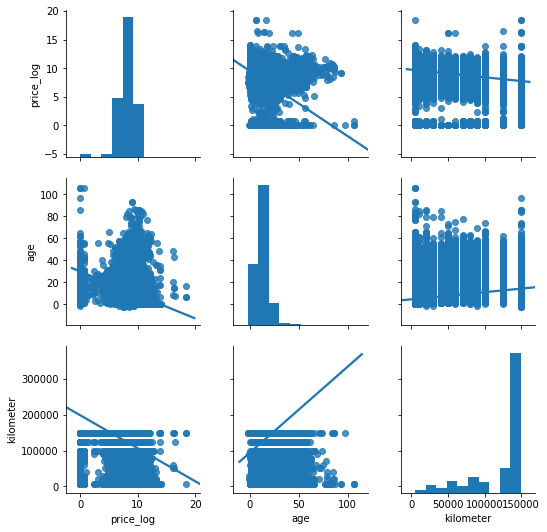

In [53]:
sns.pairplot(df[['price_log', 'age', 'kilometer, powerPS_log']], kind="reg")

### Dimensionality Reduction

In [55]:
# features
X = df.drop('price_log', axis = 1)

# Target
y = df['price_log']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=84)

In [38]:
from sklearn.decomposition import PCA

# Set up PCA for diminsionality reduction
pca = PCA(10)

# Apply PCA to the dataset X vector
X_train = pca.fit_transform(X_train)  

X_test = pca.transform(X_test)

The PCA class has an attribute `explained_variance_ratio_` which returns the *variance* caused by each of the principal components.

In [39]:
# Look at the percentage of variance explained by the different components
pca.explained_variance_ratio_

array([9.99999928e-01, 4.66564299e-08, 2.24135955e-08, 6.48692752e-10,
       2.60626783e-10, 1.71842450e-10, 1.56900555e-10, 1.49501360e-10,
       1.11388520e-10, 1.07129453e-10])

In [40]:
from sklearn.linear_model import Lasso

# Instantiate Lasso regressor
lasso = Lasso(alpha = 0.0001, normalize = True)

# Fit the regressor
lasso.fit(X, y)

# Compute the coefficients
lasso_coef = lasso.coef_

# Compute the number of features with non-zero coefficients
print(sum(lasso_coef != 0))

# Lasso score
print(lasso.score(X, y))
# print(lasso_coef)

26
0.4652101261784561


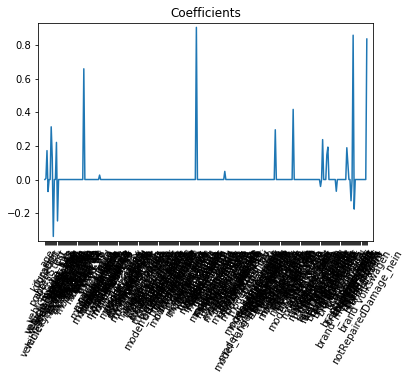

In [41]:
df_features = df.drop('price_log', axis = 1)

plt.plot(range(len(df_features.columns)), lasso_coef)
plt.xticks(range(len(df_features.columns)), df_features.columns.values, rotation=60)
plt.title('Coefficients')
plt.margins(0.02)
plt.show()

In [42]:
# df.to_csv('data/autos_clean.csv', index=False)

---

## Modelling

In [43]:
# # features
# X = df.drop('price', axis = 1).values

# # Target
# y = df['price'].values

In [44]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=84)

In [45]:
from sklearn.linear_model import LinearRegression

# Create the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.2f}".format(reg.score(X_test, y_test)))

R^2: 0.39


In [46]:
from sklearn.model_selection import cross_val_score

# Create the regressor
reg_cv = LinearRegression()

# 5-fold cross-validation score
cv_scores = cross_val_score(reg_cv, X, y, cv=5)

print(cv_scores)

[0.52225962 0.50232153 0.50513174 0.51417784 0.50850365]


In [48]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

reg_rf.fit(X_train, y_train)

reg_rf.score(X_test, y_test)

0.33181294367608705

In [49]:
reg_rf.feature_importances_

array([0.14557599, 0.        , 0.77315965, 0.08126436, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"] # default
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

---

## Evaluation

---